# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle
import os
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()

### Exploración y limpieza de datos

In [3]:
url_data = os.path.join(current_dir, "../data/raw/Dataframe_Final_Data_XGBoost.csv")
data = pd.read_csv(url_data, sep = ',')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


#### Verificamos el tamaño

In [4]:
# Obtener las dimensiones.
data.shape

(19410, 32)

#### Comprobamos que solo hay tres estados 

In [5]:
data.state_id.unique()

array(['CA'], dtype=object)

#### Comprobamos las tiendas que hay representadas

In [6]:
data.store_id.unique()

array(['CA_1'], dtype=object)

#### Obtenemos informacion general

In [7]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19410 entries, 0 to 19409
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19410 non-null  object 
 1   item_id             19410 non-null  object 
 2   dept_id             19410 non-null  object 
 3   cat_id              19410 non-null  object 
 4   store_id            19410 non-null  object 
 5   state_id            19410 non-null  object 
 6   d                   19410 non-null  object 
 7   sales               19410 non-null  int64  
 8   date                19410 non-null  object 
 9   wm_yr_wk            19410 non-null  int64  
 10  weekday             19410 non-null  object 
 11  wday                19410 non-null  int64  
 12  month               19410 non-null  object 
 13  year                19410 non-null  int64  
 14  event_name_1        19410 non-null  object 
 15  event_type_1        19410 non-null  object 
 16  even

#### Verificar duplicados

In [8]:
# Verificar si hay duplicados.
data.duplicated().sum()

np.int64(0)

En este caso no encontramos duplicados en el conjunto de datos.

#### Eliminar columnas sin relevancia

In [9]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


In [10]:
data_limpia = data.drop(columns = ['id', 'wm_yr_wk', 'weekday', 'day_of_week', 'month', 'quarter'])


print(data_limpia.columns)

data_limpia.head()

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales',
       'date', 'wday', 'year', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price',
       'is_weekend', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')


,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wday,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


#### Columnas que DESCARTAR y por qué:

`wm_yr_wk`: Puede derivarse de date.

`weekday`: Redundante con date (puedes extraer el día de la semana).

`day_of_week`: Redundante con weekday y wday.

`quarter`: Derivable de month.

#### Columnas que son de utilidad pero que hay que MODIFICAR:

`date`: En su forma cruda no son útiles, pero podemos extraer de ellas variables como: Día de la semana Mes ¿Es fin de semana o no? ¿Es feriado o no?
Entonces: descartarlas como strings, pero sacar variables derivadas antes.

`dept_id`, `cat_id`, `store_id`, `state_id`: Factorizarlas

#### Columnas ÚTILES para predecir la demanda:

`item_id`: Identificador clave del producto.

`sales`: Variable objetivo, la demanda que se quiere predecir.

`date`: Necesaria para extraer características temporales.

`store_id`: Información relevante del punto de venta.

`state_id`: Información geográfica que podría influir en la demanda.

`sell_price`: Precio de venta, importante para la demanda.

`scaled_sell_price`: Versión escalada de sell_price, útil si se normaliza la entrada.

`pi_mean`: Indicador económico relevante para la demanda.

`poblacion`: Influye en la demanda dependiendo del tamaño de la población.

`Crecimiento_p`: Crecimiento poblacional, que puede afectar la demanda.

`pib_por_estado`: Indicador económico importante.

`riqueza_per_capita`: Impacta el poder adquisitivo y la demanda.

`wti`: Relacionado con los precios del petróleo, puede afectar la demanda.



### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

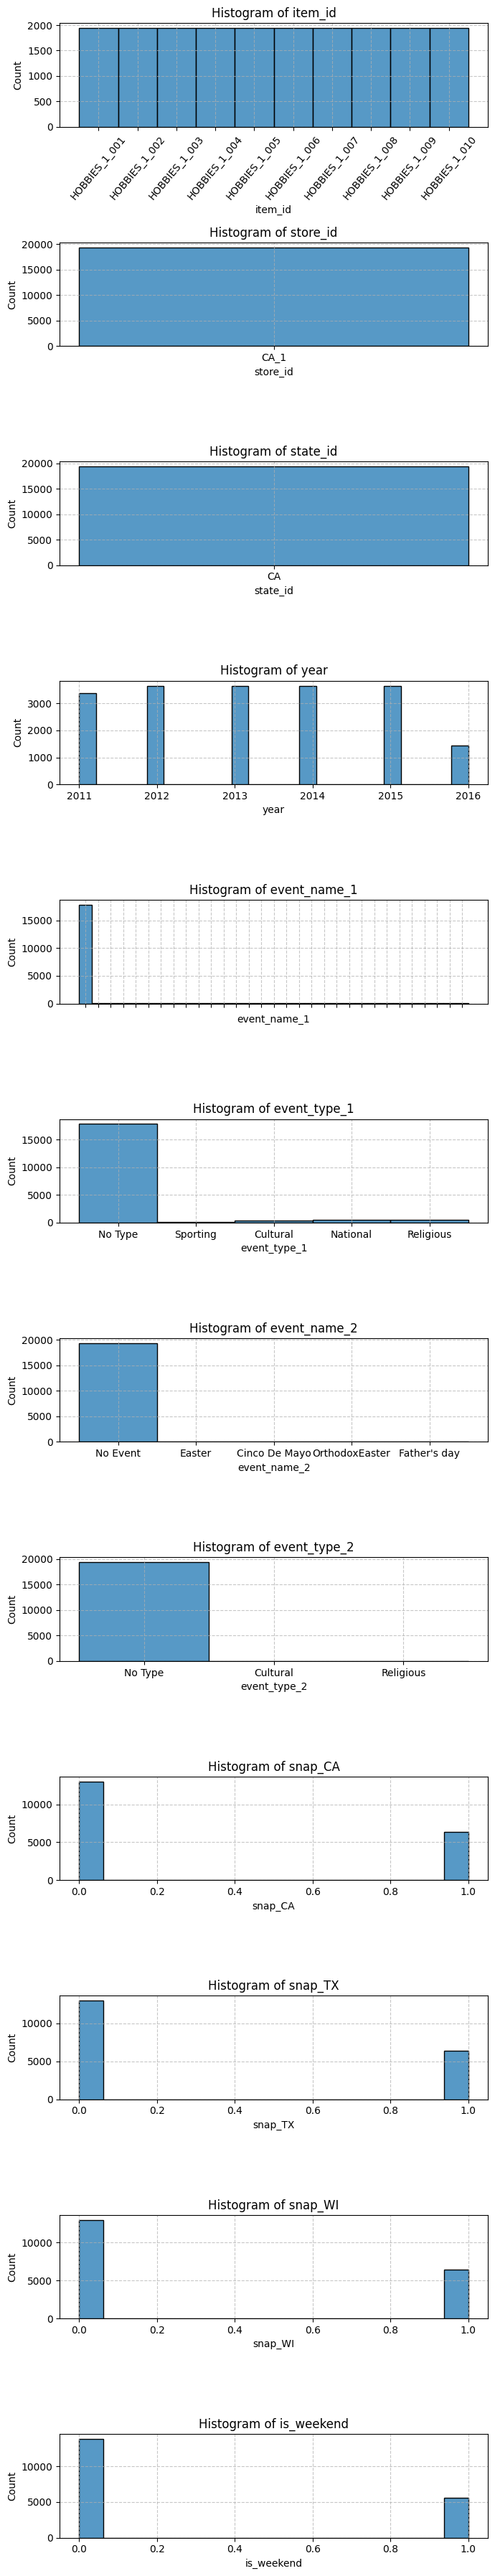

In [122]:
categoricals_variables = ['item_id', 'store_id', 'state_id', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX',
       'snap_WI', 'is_weekend']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

Los histogramas de item_id y store_id muestran distribuciones uniformes, lo que indica que todos los productos y tiendas están representados equitativamente en el conjunto de datos

Para state_id se observa uniformemente todo.

La variable year muestra un perfecto balance entre los años 2011 a 2016, con aproximadamente 3000 registros por año

El indicador is_weekend revela que los fines de semana representan cerca del 30% de los datos, proporción consistente con el calendario


En event_name_1 y event_type_1 predomina ampliamente la categoría "No Event" (sin evento registrado)

Cuando hay eventos, los tipos más frecuentes son religiosos (como Navidad) y culturales (como el Cinco de Mayo)

Para event_name_2 y event_type_2 el patrón es similar, pero con mayor predominio de "No Event"

Programas de asistencia SNAP:

Las variables snap_CA, snap_TX y snap_WI muestran distribuciones muy similares

La mayoría de registros se concentran en valores bajos (0-0.2), lo que podría indicar días donde no hubo distribución de beneficios.

Existe coherencia entre las diferentes variables categóricas

No se observan desbalances significativos que puedan afectar los análisis

#### Análisis sobre variables numéricas

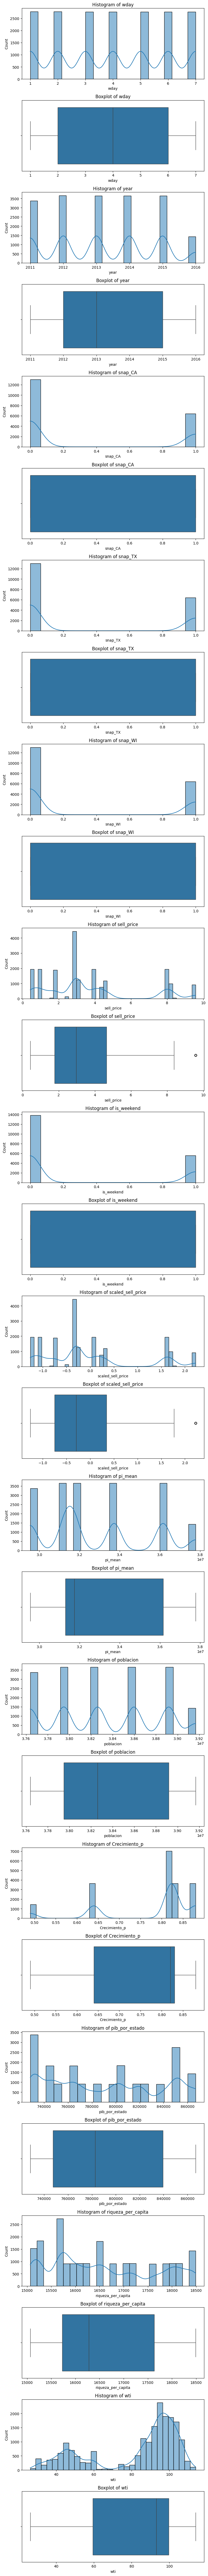

In [123]:
numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['sales']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        # Rango para el histograma y el boxplot de columna1...
        
           
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

Como podemos obeservar wday suele ser constante a lo largo de los anos y en el boxplot los datos van desde 2 hasta 6.

en year todos los anos practicamente tambien son igual excepto en 2016 que se ve una bajada significativa.

Tanto en snap CA, snap_TX y snap_WI son practicamente iguales los tres se reparten los datos entre 0 y 1 aunque predomina mas el 0.

Sell prices como se puede observar tiene una subida alrededor de 3 y una bajada entre 5 y 8 pero el resto son unos precios muy parecidos.

is_weekend es muy parecido a lo de snap_ predominando mas el 0.

pi_mean es muy parejo excepto al final que se puede ver una bajada a casi la mitad.

el crecimiento se reparten en 0.50, 0.65, a partir de 0.80 y 0,90 se reparten practicamente los datos.

pib hay un pico alrededor de 74000 pero los demas datos se reparten basate equitativamente y parecidos en el resto de puntos.

riquezalos datos tambien son bastante equitativos con unos picos entre 15500 y 16000 y tambien en 16500 pero no mucho despunte.

wti se puede observar como hay una bajada entre 60 y 80 y el pico mas alto esta en 100 volviendo a bajar seguidamente.




### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico

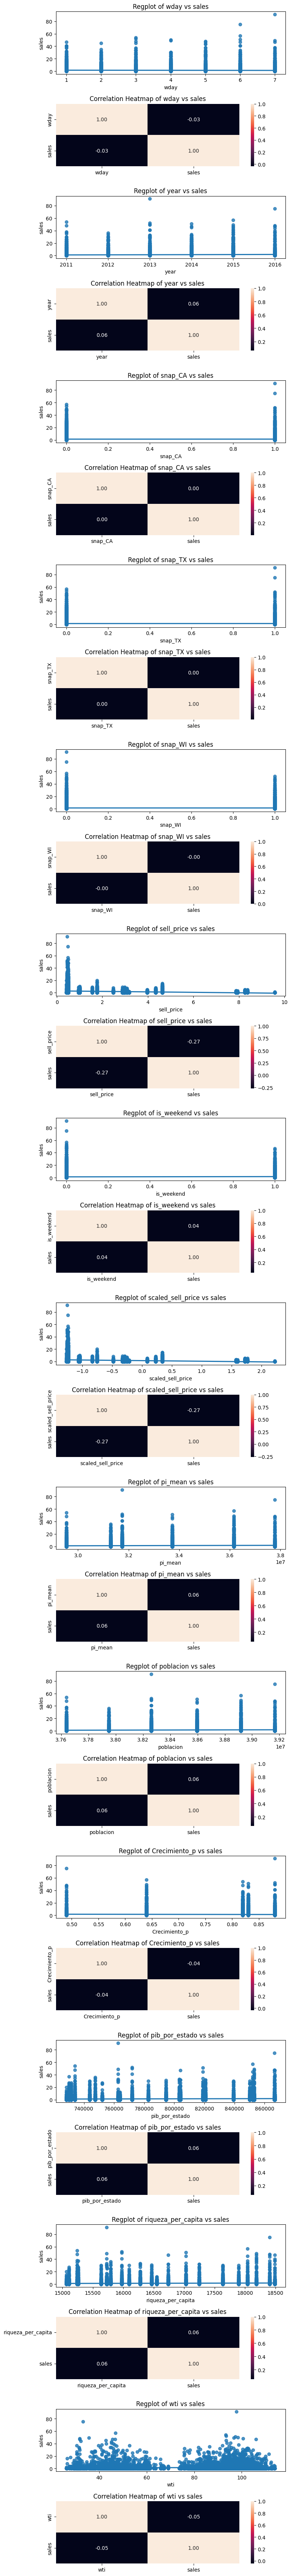

,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wday,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19


In [124]:

numericals_variables = data_limpia.select_dtypes(include = ['number']).drop(columns=['sales']).columns.tolist() # Con esta linea seleccionamos las columnas numericas del dataframe.

  
def plot_numerico_numerico(data_set, variables_numericas):

    target = 'sales' # Recordar cambiar el target.     
    
    # Crear una figura con 1 columna y 2 filas por cada variable
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, (len(variables_numericas) * 5)))

    # Crear un diagrama de dispersión múltiple                
    for i, col in enumerate(variables_numericas):

        # Regplot en la primera fila (fila 2 * i)
        sns.regplot(ax = axis[i * 2], data = data_set, x = col, y = target)
        axis[i * 2].set_title(f'Regplot of {col} vs {target}')
        
        # Heatmap en la segunda fila.
        sns.heatmap(data_set[[col, target]].corr(), annot = True, fmt = ".2f", ax = axis[i * 2 + 1], cbar = True)
        axis[i * 2 + 1].set_title(f'Correlation Heatmap of {col} vs {target}')

    plt.tight_layout()
    plt.show()

plot_numerico_numerico(data_limpia, numericals_variables)

data_limpia.head()

Relaciones visuales (Regplots):

Cada gráfico muestra cómo se relacionan las ventas (sales) con otras variables numéricas (precios, día de la semana, año, etc.).

Si los puntos forman una línea clara (hacia arriba o abajo), hay relación fuerte. Si están dispersos, la relación es débil.

Correlaciones (Heatmaps):

Los mapas de calor confirman numéricamente la relación (valores entre -1 y 1).

Cercano a 1: Relación positiva fuerte (si una sube, la otra también).

Cercano a -1: Relación negativa fuerte (si una sube, la otra baja).

Cercano a 0: No hay relación clara.

Hallazgos clave:

Precio (sell_price): Correlación negativa con ventas (al subir el precio, bajan las ventas).

Día de la semana (wday): Algunos días tienen más ventas (ej: fin de semana).

Año (year): ¿Hay tendencia de crecimiento o caída anual?

Programas SNAP (snap_CA/TX/WI): ¿Afectan a las ventas?

**Análisis de posibles relaciones entre variables numericas**

<Axes: >

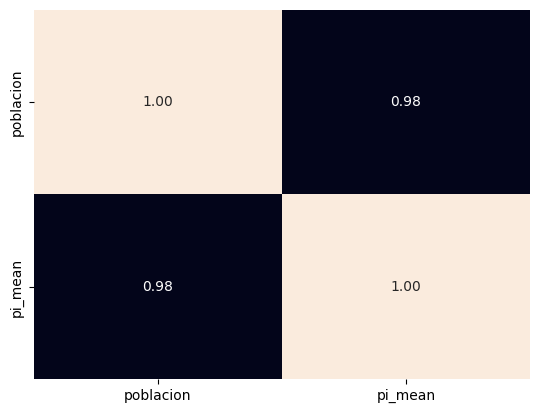

In [125]:
sns.regplot(data = data_limpia, x = "poblacion", y = "pi_mean")
sns.heatmap(data_limpia[["poblacion", "pi_mean"]].corr(), annot = True, fmt = ".2f", cbar = False)

Revela una correlación casi perfecta de 0.98

Indica que cuando aumenta la población, pi_mean casi siempre aumenta también

<Axes: >

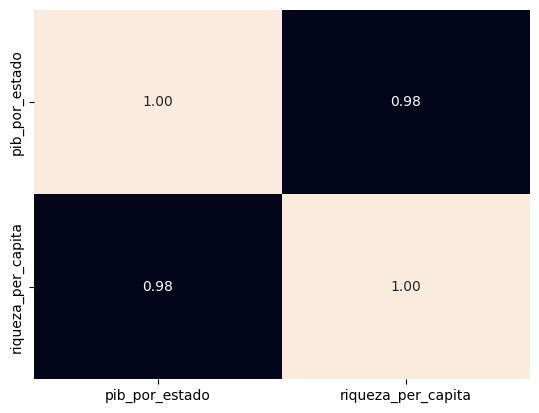

In [126]:
sns.regplot(data = data_limpia, x = "pib_por_estado", y = "riqueza_per_capita")
sns.heatmap(data_limpia[["pib_por_estado", "riqueza_per_capita"]].corr(), annot = True, fmt = ".2f", cbar = False)

Correlación casi perfecta (0.98):

Cuando el PIB estatal aumenta, la riqueza individual también sube.

Esta relación es extremadamente fuerte y consistente.

<Axes: >

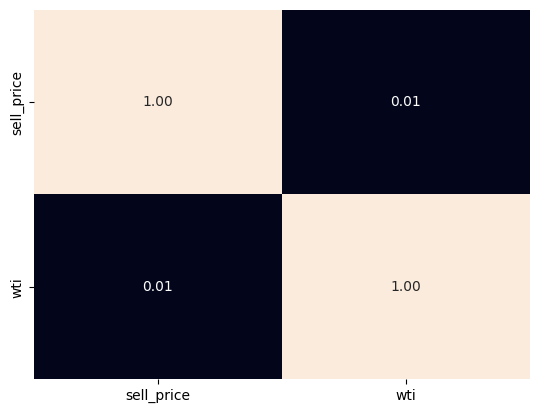

In [127]:
sns.regplot(data = data_limpia, x = "sell_price", y = "wti")
sns.heatmap(data_limpia[["sell_price", "wti"]].corr(), annot = True, fmt = ".2f", cbar = False)

Correlación casi nula (0.01):

No hay relación evidente entre el precio del petróleo y los precios de venta en los datos analizados.

#### Combinaciones de la clase con varias predictoras

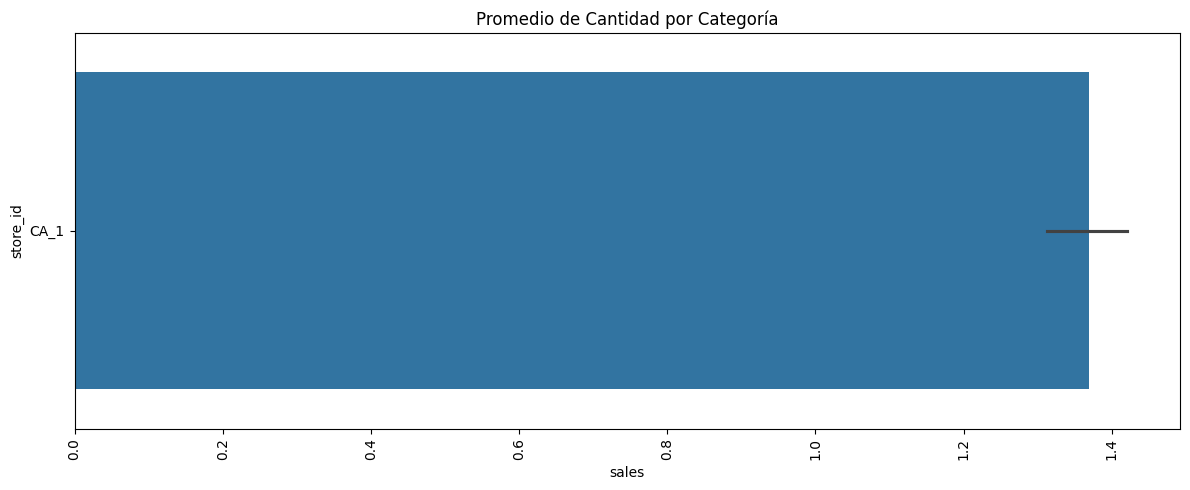

In [128]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sales', y='store_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

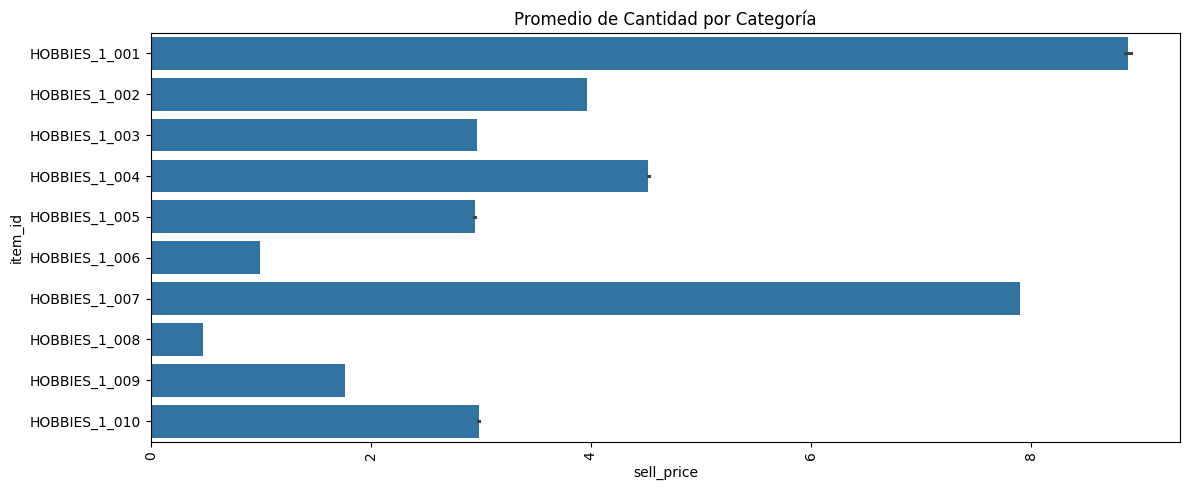

In [129]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sell_price', y='item_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

Compara los precios promedio (sell_price) de diferentes productos (item_id).

Cada barra representa un producto específico (HOBBIES_1_001 al HOBBIES_1_010).

Los precios varían significativamente entre productos.

Algunos artículos tienen precios notablemente más altos que otros.

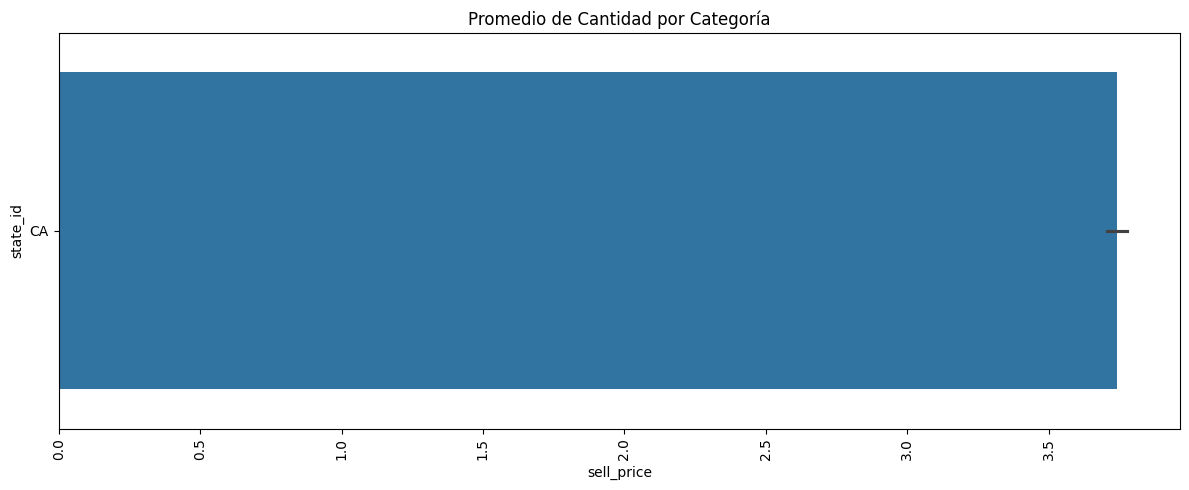

In [130]:
plt.figure(figsize=(12, 5))
sns.barplot(data=data_limpia, x='sell_price', y='state_id')
plt.xticks(rotation=90)
plt.title('Promedio de Cantidad por Categoría')
plt.tight_layout()
plt.show()

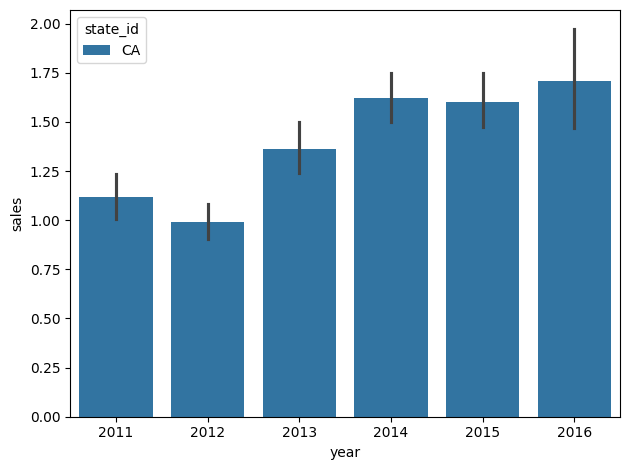

In [132]:
sns.barplot(data = data_limpia, x = "year", y = 'sales', hue = 'state_id')

plt.tight_layout()
plt.show()

Muestra cómo evolucionaron las ventas desde 2011 hasta 2016 y como se observa  en 2011 y 2012 hay una pequena bajada que cada ano van creciendo respecto al anterior, 2015 tambien hubo una minima bajada que se recupera en 2016.


#### Factorización

In [11]:

data_limpia["dept_id_n"] = pd.factorize(data_limpia["dept_id"])[0]
data_limpia["cat_id_n"] = pd.factorize(data_limpia["cat_id"])[0]
data_limpia["store_id_n"] = pd.factorize(data_limpia["store_id"])[0]
data_limpia["state_id_n"] = pd.factorize(data_limpia["state_id"])[0]
data_limpia["item_id_n"] = pd.factorize(data_limpia["item_id"])[0]
data_limpia["event_name_1_n"] = pd.factorize(data_limpia["event_name_1"])[0]
data_limpia["event_type_1_n"] = pd.factorize(data_limpia["event_type_1"])[0]
data_limpia["event_name_2_n"] = pd.factorize(data_limpia["event_name_2"])[0]
data_limpia["event_type_2_n"] = pd.factorize(data_limpia["event_type_2"])[0]

dept_id_transformation_rules = {row["dept_id"]: row["dept_id_n"] for _, row in data_limpia[["dept_id", "dept_id_n"]].drop_duplicates().iterrows()}
cat_id_transformation_rules = {row["cat_id"]: row["cat_id_n"] for _, row in data_limpia[["cat_id", "cat_id_n"]].drop_duplicates().iterrows()}
state_id_transformation_rules = {row["state_id"]: row["state_id_n"] for _, row in data_limpia[["state_id", "state_id_n"]].drop_duplicates().iterrows()}
item_id_transformation_rules = {row["item_id"]: row["item_id_n"] for _, row in data_limpia[["item_id", "item_id_n"]].drop_duplicates().iterrows()}
store_id_transformation_rules = {row["store_id"]: row["store_id_n"] for _, row in data_limpia[["store_id", "store_id_n"]].drop_duplicates().iterrows()}
event_name_1_transformation_rules = {row["event_name_1"]: row["event_name_1_n"] for _, row in data_limpia[["event_name_1", "event_name_1_n"]].drop_duplicates().iterrows()}
event_type_1_transformation_rules = {row["event_type_1"]: row["event_type_1_n"] for _, row in data_limpia[["event_type_1", "event_type_1_n"]].drop_duplicates().iterrows()}
event_name_2_transformation_rules = {row["event_name_2"]: row["event_name_2_n"] for _, row in data_limpia[["event_name_2", "event_name_2_n"]].drop_duplicates().iterrows()}
event_type_2_transformation_rules = {row["event_type_2"]: row["event_type_2_n"] for _, row in data_limpia[["event_type_2", "event_type_2_n"]].drop_duplicates().iterrows()}

# for k, v in IsAllergic_transformation_rules.items():
#     print(f"Key: {k} (type: {type(k)}), Value: {v} (type: {type(v)})")
#     break  # eliminá este break si querés verlos todos



transformation_rules_path = os.path.join(current_dir, '../data/jsons/transformation_rules.json')

def convertir_dict(dic):
    return {str(k): int(v) if isinstance(v, (np.integer, bool)) else v for k, v in dic.items()}

transformation_rules = {
    "dept_id_rules": convertir_dict(dept_id_transformation_rules),
    "cat_id_rules": convertir_dict(cat_id_transformation_rules),
    "state_id_rules": convertir_dict(state_id_transformation_rules),
    "item_id_rules": convertir_dict(item_id_transformation_rules),
    "store_id_rules": convertir_dict(store_id_transformation_rules),
    "event_name_1_rules": convertir_dict(event_name_1_transformation_rules),
    "event_type_1_rules": convertir_dict(event_type_1_transformation_rules),
    "event_name_2_rules": convertir_dict(event_name_2_transformation_rules),
    "event_type_2_rules": convertir_dict(event_type_2_transformation_rules)
}


with open(transformation_rules_path, "w") as f:
  json.dump(transformation_rules, f)


##### Análisis de correlaciones. 

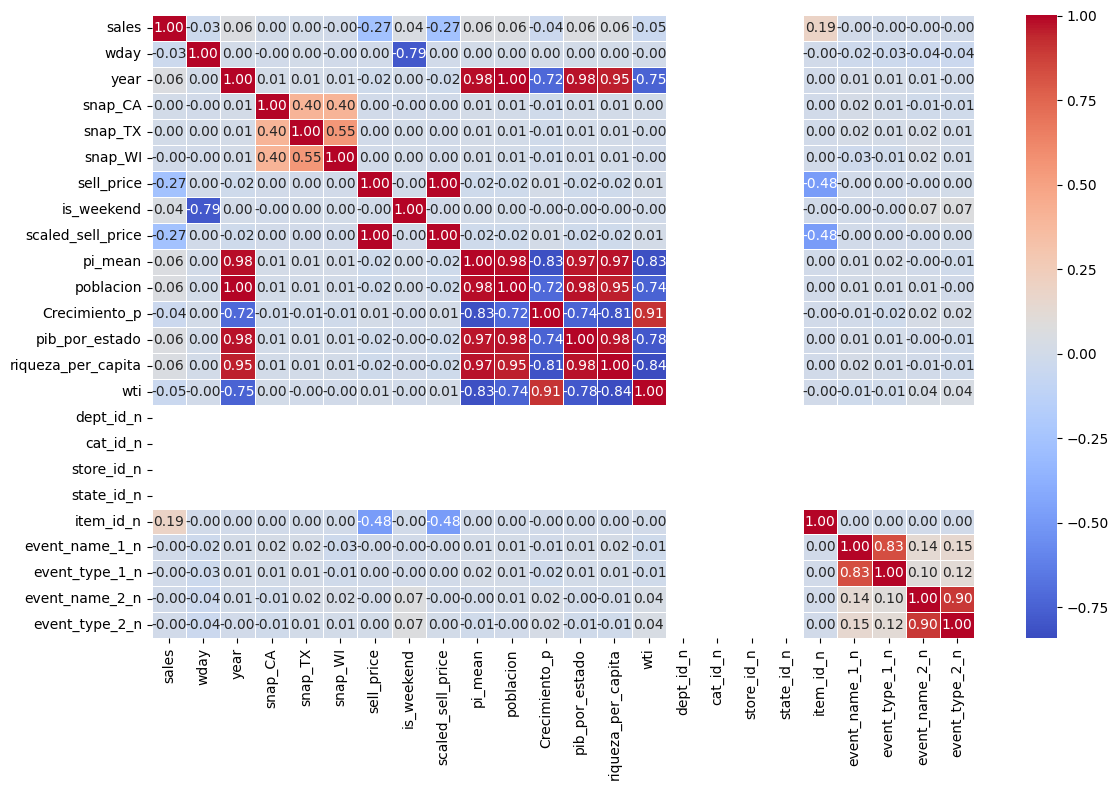

In [134]:
def plot_matriz_correlacion(data_set):

    corr_matrix = data_set.select_dtypes(include = ['number']).corr() # Con esta linea seleccionamos las columnas numericas del dataframe.

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot = True, fmt = ".2f", linewidths = 0.5, cmap = "coolwarm")

    plt.tight_layout()
    plt.show()

plot_matriz_correlacion(data_limpia)

Relaciones fuertemente positivas 
scaled_sell_price y sell_price están casi 100% relacionadas. Eso significa que básicamente son lo mismo, solo que una está ajustada o escalada.

Las variables como pib_por_estado, riqueza_per_capita, pi_mean y Crecimiento_p están muy conectadas entre sí. Todas hablan de cómo es la economía de un lugar, por eso tienen valores tan parecidos.

year (año) también se relaciona bastante con estas variables económicas, lo que indica que la economía ha cambiado a lo largo del tiempo.

Hay una relación muy fuerte entre los nombres y tipos de eventos (como event_name_1_n, event_type_1_n, etc.), lo que sugiere que cuando cambia uno, probablemente cambia el otro también. Es información muy similar.

Relaciones negativas 
sales (ventas) baja cuando sube el precio (sell_price y scaled_sell_price). Esto tiene sentido: si el precio sube, la gente compra menos.

item_id_n (el número de identificación del producto) tiene una relación débilmente negativa con algunas variables. Esto puede significar que ciertos productos simplemente se comportan diferente a los demás.

Ventas (sales)
Las ventas no están fuertemente relacionadas con ninguna sola variable. Solo tienen una relación moderada con el precio. Esto sugiere que para entender las ventas, hay que mirar varios factores al mismo tiempo, no uno solo.

 Relaciones temporales
El día de la semana (wday) y si es fin de semana (is_weekend) están muy conectados. Esto tiene sentido porque los fines de semana siempre caen en ciertos días (como sábado y domingo).



#### Pairpolot

In [ ]:
# # graficar el pairplot.

# sns.pairplot(data = data_limpia)

# plt.tight_layout()
# plt.show()

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [12]:
data_limpia.describe()

,sales,wday,year,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n
count,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000,1.941000e+04,1.941000e+04,1.941000e+04,19410.000000,19410.000000,19410.000000,19410.000000,19410.0,19410.0,19410.0,19410.0,19410.000000,19410.000000,19410.000000,19410.000000,19410.000000
mean,1.369706,3.997424,2013.249356,0.329727,0.329727,0.329727,3.740428,0.286450,1.566782e-16,3.292068e+07,3.834748e+07,0.775003,791146.198454,16555.866907,82.167917,0.0,0.0,0.0,0.0,4.500000,1.214838,0.236476,0.005152,0.002576
std,3.736180,2.000694,1.557014,0.470126,0.470126,0.470126,2.622851,0.452114,1.000026e+00,2.563902e+06,4.910375e+05,0.113082,46131.203831,1075.301942,23.630216,0.0,0.0,0.0,0.0,2.872355,4.789742,0.842743,0.124218,0.059999
min,0.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.420000,0.000000,-1.265994e+00,2.954186e+07,3.763837e+07,0.490000,728344.566667,15065.000000,26.210000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2012.000000,0.000000,0.000000,0.000000,1.770000,0.000000,-7.512736e-01,3.128902e+07,3.794880e+07,0.640000,747457.133333,15728.333333,59.372000,0.0,0.0,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,2013.000000,0.000000,0.000000,0.000000,2.970000,0.000000,-2.937445e-01,3.173940e+07,3.826079e+07,0.820000,782682.166667,16277.333333,93.034286,0.0,0.0,0.0,0.0,4.500000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,2015.000000,1.000000,1.000000,1.000000,4.640000,1.000000,3.429837e-01,3.615603e+07,3.891804e+07,0.830000,839466.500000,17635.333333,99.600000,0.0,0.0,0.0,0.0,7.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,7.000000,2016.000000,1.000000,1.000000,1.000000,9.580000,1.000000,2.226479e+00,3.777824e+07,3.916712e+07,0.880000,866869.700000,18491.000000,113.930000,0.0,0.0,0.0,0.0,9.000000,30.000000,4.000000,4.000000,2.000000


#### Boxplots para visualizar los outliers

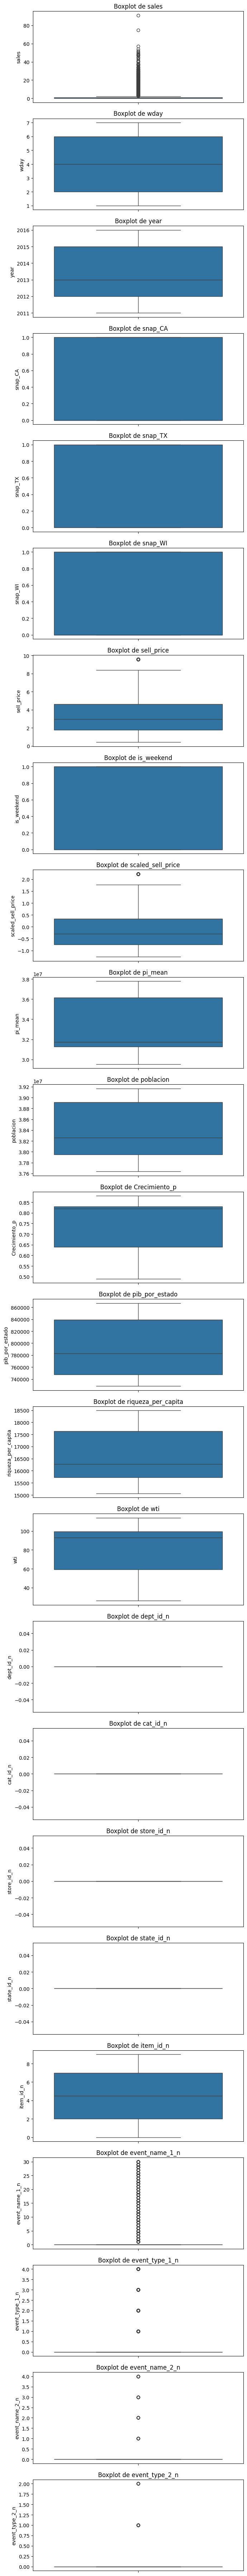

In [137]:
def plot_boxplots_numericos(data_set):
    # Esta variable filtrará el data frame y me devolverá los nombres de las columnas numericas. 
    column_filter_numericas = data_set.select_dtypes(include = 'number').drop(columns = [''], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.
    
    # Crear el gráfico con subgráficas en una sola columna
    fig, axis = plt.subplots(len(column_filter_numericas), 1, figsize=(7, len(column_filter_numericas) * 3))
     
    # Si solo hay una columna, `axis` no es un array, lo convertimos en uno
    if len(column_filter_numericas) == 1:
        axis = [axis]
    
    # Generar los boxplots para cada columna numérica.
    for i, columna in enumerate(column_filter_numericas):
        sns.boxplot(ax = axis[i], data = data_set, y = columna)
        axis[i].set_title(f'Boxplot de {columna}')
    
    plt.tight_layout()
    plt.show()

plot_boxplots_numericos(data_limpia)

Outliers 
sales tiene muchos valores muy altos.

event_name/type tienen muchos ceros y algunos pocos valores, lo que indica que los eventos ocurren pocas veces.

sell_price, scaled_sell_price, wti y variables como wday, year, snap, is_weekend, etc., no tienen valores extremos.


pib_por_estado, riqueza_per_capita, pi_mean tienen algo de variación, lo cual es normal entre regiones.

#### Inferencia de nuevas características

In [13]:
# Asegurarse de que la columna Date es datetime
data_limpia['date'] = pd.to_datetime(data_limpia['date'])

data_limpia['month'] = data_limpia['date'].dt.month
data_limpia['day'] = data_limpia['date'].dt.day

data_limpia.head()

,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wday,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n,month,day
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,0,0,0,0,0,1,29
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,1,0,0,0,0,1,29
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,2,0,0,0,0,1,29
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,3,0,0,0,0,1,29
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,4,0,0,0,0,1,29


#### Separación del Dataset en uno con outliers y otro sin outliers

In [14]:
# Separar mi data frame en uno con outliers y otro sin outliers.
# Funcion que remplaza los outliers y me devuelve una copia del data frame sin outliers, pero que ademas tambien me devuelve la lista de 
# limites de outliers para luego merterlas en un diccionario.

data_limpia_con_outliers = data_limpia.copy()
data_limpia_sin_outliers = data_limpia.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = 0
  
  # Replace upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Replace lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)

  return df.copy(), [lower_limit, upper_limit]


# Crear diccionario con los limites de outliers para poder guardarlos y a la vez llamar a la funcion para que convierta la copia del 
# dataframe a sin outliers y tener las dos variables con cada dataframe (el con y el sin) disponibles para los siguientes pasos. 

outliers_dict = {}

for column in ['riqueza_per_capita']: # RECORDAR CAMBIAR LAS COLUMNAS. 
  data_limpia_sin_outliers, limits_list = replace_outliers_from_column(column, data_limpia_sin_outliers)
  outliers_dict[column] = limits_list

# Guardar el diccionario en un archivo json.  

outliers_replacement_path = os.path.join(current_dir, '../data/jsons/outliers_replacement.json')

with open(outliers_replacement_path, "w") as f:
    json.dump(outliers_dict, f)

#### Escalado de valores

In [15]:
num_variables = data_limpia.select_dtypes(include = 'number').drop(columns = ['sales'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

# Asegurarse de que la columna Date es datetime
data_limpia_con_outliers['date'] = pd.to_datetime(data_limpia_con_outliers['date'])
data_limpia_sin_outliers['date'] = pd.to_datetime(data_limpia_sin_outliers['date'])

# Ordenar por fecha (por si acaso)
data_limpia_con_outliers = data_limpia_con_outliers.sort_values('date')
data_limpia_sin_outliers = data_limpia_sin_outliers.sort_values('date')

# Definir fecha de corte para los últimos 15 días
fecha_corte = data_limpia_con_outliers['date'].max() - pd.Timedelta(days=30)

# Split CON outliers
train_con_outliers = data_limpia_con_outliers[data_limpia_con_outliers['date'] <= fecha_corte]
test_con_outliers = data_limpia_con_outliers[data_limpia_con_outliers['date'] > fecha_corte]

# Split SIN outliers
train_sin_outliers = data_limpia_sin_outliers[data_limpia_sin_outliers['date'] <= fecha_corte]
test_sin_outliers = data_limpia_sin_outliers[data_limpia_sin_outliers['date'] > fecha_corte]

# Separar variables X e y (Quantity)
X_train_con_outliers = train_con_outliers.drop(columns=['sales', 'date'])[num_variables]
y_train = train_con_outliers['sales']
X_test_con_outliers = test_con_outliers.drop(columns=['sales', 'date'])[num_variables]
y_test = test_con_outliers['sales']

X_train_sin_outliers = train_sin_outliers.drop(columns=['sales', 'date'])[num_variables]
X_test_sin_outliers = test_sin_outliers.drop(columns=['sales', 'date'])[num_variables]

# GUARDAR LOS DATASETS

X_train_con_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_train_con_outliers.csv'), index = False)
X_train_sin_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_train_sin_outliers.csv'), index = False)
X_test_con_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_test_con_outliers.csv'), index = False)
X_test_sin_outliers.to_csv(os.path.join(current_dir,'../data/csv_model/X_test_sin_outliers.csv'), index = False)
y_train.to_csv(os.path.join(current_dir,'../data/csv_model/y_train.csv'), index = False)
y_test.to_csv(os.path.join(current_dir,'../data/csv_model/y_test.csv'), index = False)

X_train_con_outliers.head()

,wday,year,snap_CA,snap_TX,snap_WI,sell_price,is_weekend,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti,dept_id_n,cat_id_n,store_id_n,state_id_n,item_id_n,event_name_1_n,event_type_1_n,event_name_2_n,event_type_2_n,month,day
0,1,2011,0,0,0,9.58,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,0,0,0,0,0,1,29
1,1,2011,0,0,0,3.97,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,1,0,0,0,0,1,29
2,1,2011,0,0,0,2.97,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,2,0,0,0,0,1,29
3,1,2011,0,0,0,4.34,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,3,0,0,0,0,1,29
4,1,2011,0,0,0,2.98,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.19,0,0,0,0,4,0,0,0,0,1,29
